In [6]:
import csv
import numpy as np
import random
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from phase_features_loader import PhaseFeaturesLoader
from imblearn.metrics import classification_report_imbalanced
from imblearn.combine import SMOTETomek, SMOTEENN

In [14]:
max_length = 100
FILENAME = "data/phase/ml_feature_bck2.csv"
STA = "LPAZ"
phase_index = {'P':0, 'S':1, 'T':2, 'N':3}
dataset_train = "data/phase/ml_features_train.csv"
dataset_test = "data/phase/ml_features_test.csv"
validation_split = 0.1
batch_size = 1024

In [12]:
def phase_read(filename, sta, max_length_phase: {'P':100, 'S':100, 'T':100, 'N':100 }):
    global phase_index
    features = [[], [], [], []]
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile)
        i = -1
        for row in reader:
            i += 1
            if i == 0 or row[1] != sta:
                continue
            ## test with random data:
            # x=[]
            # for y in range(16):
            #    x.append(random.random()*10+(phase_index[row[4]]*10))
            # features[phase_index[row[4]]].append(x)
            
            try:
                x = [float(y) for y in row[8:24]]
            except:
                # print("There is wrong data in line: {}: {}".format(i, row))
                continue
            features[phase_index[row[4]]].append(x)
            
            # features[phase_index[row[4]]].append(row[8:24])

    features_compact_x = []
    features_compact_y = []
    for index in phase_index:
        phase_length = len(features[phase_index[index]])
        if phase_length == 0:
            continue
        indices = np.arange(phase_length)
        random.shuffle(indices)
        f = np.array(features[phase_index[index]])
        i = indices[:max_length_phase[index]]
        features_compact_x.extend(f[i])
        features_compact_y.extend([phase_index[index]]*min(max_length_phase[index], phase_length))

    return features_compact_x, features_compact_y

In [4]:
phase_length = {'P':1200, 'S':1200, 'T':1200, 'N':1200 }
phase_color = {'P':'r', 'S':'g', 'T':'b', 'N':'yellow' }
X, Y = phase_read(FILENAME, STA, phase_length)

In [7]:
def prepare(x, y, smote=False):        
    if smote:
        sme = SMOTEENN(random_state=1)
        x_out, y_out = sme.fit_sample(x_train, y_train)
    else:
        x_out, y_out = x, y
    return x_out, y_out

In [26]:
phase_length_all = {"URZ": {"regP": 1200, "regS": 1200, "tele": 1200, "N": 1200*3}}
phase_index = {'regP':0, 'regS':1, 'tele':2, 'N':3}
phase_color = {'regP':'r', 'regS':'g', 'tele':'b', 'N':'yellow' }

In [15]:
# load dataset
pd_train = PhaseFeaturesLoader(filename=dataset_train, validation_split=validation_split,
                         phase_length=phase_length, batch_size=batch_size)

x_train, y_train = pd_train.get_dataset(expand_dim=False, y_onehot=False)
# x_train, y_train = prepare(x_train, y_train, smote=True)

length regP:1200
length regS:1200
length tele:1200
length N:3600


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7200 samples in 0.004s...
[t-SNE] Computed neighbors for 7200 samples in 0.333s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7200
[t-SNE] Computed conditional probabilities for sample 2000 / 7200
[t-SNE] Computed conditional probabilities for sample 3000 / 7200
[t-SNE] Computed conditional probabilities for sample 4000 / 7200
[t-SNE] Computed conditional probabilities for sample 5000 / 7200
[t-SNE] Computed conditional probabilities for sample 6000 / 7200
[t-SNE] Computed conditional probabilities for sample 7000 / 7200
[t-SNE] Computed conditional probabilities for sample 7200 / 7200
[t-SNE] Mean sigma: 0.338057
[t-SNE] Computed conditional probabilities in 0.575s
[t-SNE] Iteration 50: error = 87.0047531, gradient norm = 0.0138166 (50 iterations in 18.731s)
[t-SNE] Iteration 100: error = 67.4621429, gradient norm = 0.0019474 (50 iterations in 14.198s)
[t-SNE] Iteration 150: error = 65.7511826, gradient norm 

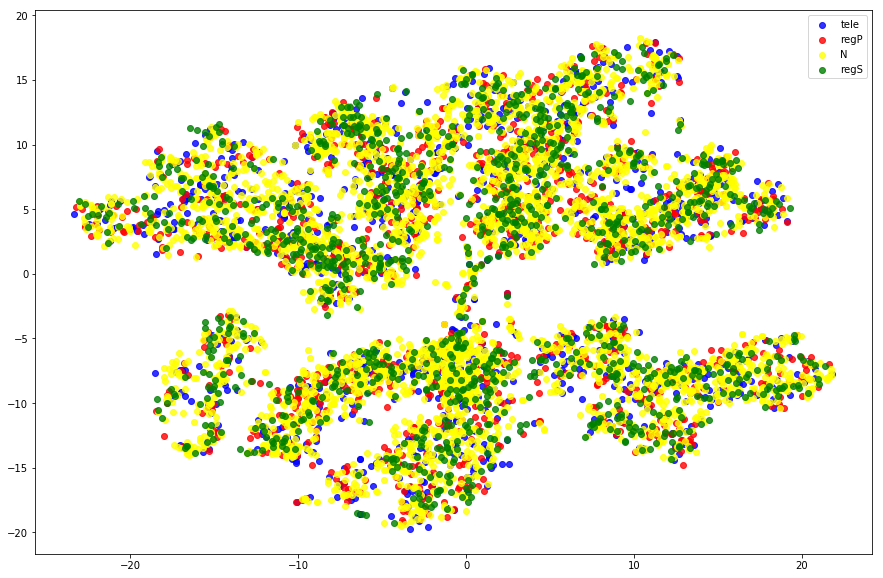

In [22]:
# for p in [1, 5, 10, 20, 30, 40, 50, 70, 100]:
phase_length = phase_length_all["URZ"]
for p in [50]:
    X_tsne = TSNE(learning_rate=200, n_components=3, 
                  perplexity=p, verbose=2, metric='chebyshev').fit_transform(x_train)
    fig = plt.figure(figsize=(15, 10))
    last_phase_length = 0
    scatter = []
    for index in phase_index:
        print("index:{}, last_phase_length:{}".format(index, last_phase_length))
        s = plt.scatter(X_tsne[last_phase_length:last_phase_length+phase_length[index], 0], 
                    X_tsne[last_phase_length:last_phase_length+phase_length[index], 1], 
        #            X_tsne[last_phase_length:last_phase_length+phase_length[index], 2],
                    alpha=0.8, c=phase_color[index], label=index)
        scatter.append(s)
        last_phase_length += phase_length[index]
    
    plt.legend(handles=scatter)
    plt.show()

In [23]:
x_train, y_train = prepare(x_train, y_train, smote=True)

In [24]:
print(x_train.shape)

(10427, 16)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10427 samples in 0.006s...
[t-SNE] Computed neighbors for 10427 samples in 0.484s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10427
[t-SNE] Computed conditional probabilities for sample 2000 / 10427
[t-SNE] Computed conditional probabilities for sample 3000 / 10427
[t-SNE] Computed conditional probabilities for sample 4000 / 10427
[t-SNE] Computed conditional probabilities for sample 5000 / 10427
[t-SNE] Computed conditional probabilities for sample 6000 / 10427
[t-SNE] Computed conditional probabilities for sample 7000 / 10427
[t-SNE] Computed conditional probabilities for sample 8000 / 10427
[t-SNE] Computed conditional probabilities for sample 9000 / 10427
[t-SNE] Computed conditional probabilities for sample 10000 / 10427
[t-SNE] Computed conditional probabilities for sample 10427 / 10427
[t-SNE] Mean sigma: 0.356143
[t-SNE] Computed conditional probabilities in 0.721s
[t-SNE] Iteration 50: error = 91.86

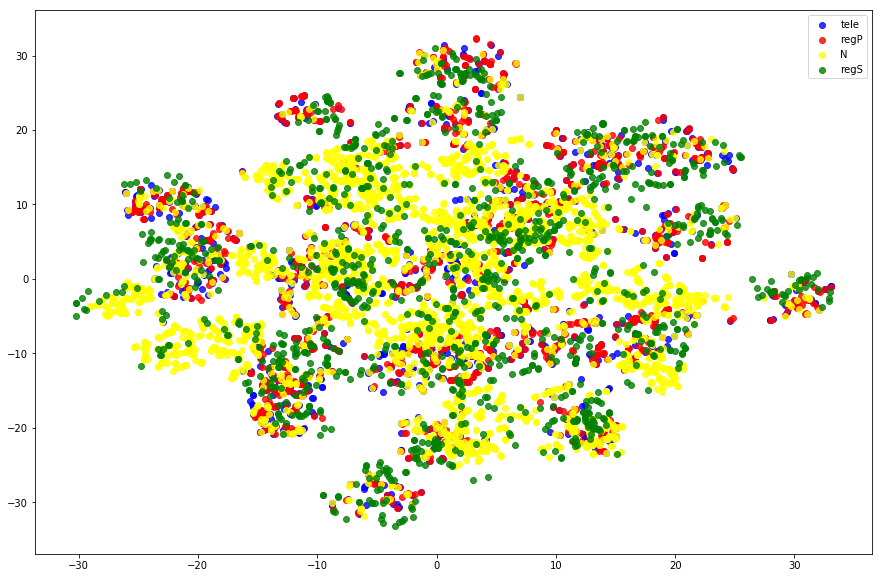

In [27]:
# for p in [1, 5, 10, 20, 30, 40, 50, 70, 100]:
phase_length = phase_length_all["URZ"]
for p in [50]:
    X_tsne = TSNE(learning_rate=200, n_components=3, 
                  perplexity=p, verbose=2, metric='chebyshev').fit_transform(x_train)
    fig = plt.figure(figsize=(15, 10))
    last_phase_length = 0
    scatter = []
    for index in phase_index:
        print("index:{}, last_phase_length:{}".format(index, last_phase_length))
        s = plt.scatter(X_tsne[last_phase_length:last_phase_length+phase_length[index], 0], 
                    X_tsne[last_phase_length:last_phase_length+phase_length[index], 1], 
        #            X_tsne[last_phase_length:last_phase_length+phase_length[index], 2],
                    alpha=0.8, c=phase_color[index], label=index)
        scatter.append(s)
        last_phase_length += phase_length[index]
    
    plt.legend(handles=scatter)
    plt.show()